<a href="https://colab.research.google.com/github/kdhaw6/Unsupervised-ML---Netflix-Movies-and-Tv-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering_%7C_Project_%7C_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Movies and Tv Shows Clustering**
**Project Type - Unsupervised**

**Contribution - Individual**

**Team Member - Kunal Dhawan (kunaldhawan.kd1@gmail.com)**

Link to Video : https://drive.google.com/file/d/12oIkk-xb41wa4TlIJt_czkOfbCxGe9SF/view?usp=drive_link

Link to github:

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-2dae926b6159>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [6]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
df.shape

(7787, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Director, cast, country, date_added, and rating columns have null values.

The date_added feature contains dates, but its datatype incorrectly associates an object.

In [11]:
##checking and dropping duplicates
df.duplicated().sum()


0

In [30]:
##checking null values
show_nulls = pd.DataFrame({'columns' : df.columns, 'number_of_nulls': df.isna().sum(), 'pct_nulls': df.isna().sum()*100/len(df)})
show_nulls.sort_values(by= 'pct_nulls', ascending=False)

,columns,number_of_nulls,pct_nulls
director,director,2389,30.679337
cast,cast,718,9.220496
country,country,507,6.510851
date_added,date_added,10,0.128419
rating,rating,7,0.089893
show_id,show_id,0,0.000000
type,type,0,0.000000
title,title,0,0.000000
release_year,release_year,0,0.000000
duration,duration,0,0.000000


In [4]:
## Handling null values

# Filling null values of features director, cast and country
df.director.fillna("Director Unavailable",inplace=True)
df.cast.fillna("Cast Unavailable",inplace=True)
df.country.fillna("Country Unavailable",inplace=True)

# Dropping null values from date_added and rating columns
df.dropna(subset=["date_added",'rating'],inplace=True)

*   Since there are many null values for features like director, cast, and country, those null values cannot be dropped; instead, they have been substituted with director Unavailable, Cast Unavailability, and Country Unavailable, accordingly.

*   Features such as date_added and rating have a very low number of null values, so we dropped those null values



In [7]:
#Checking for Null Values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# EDA

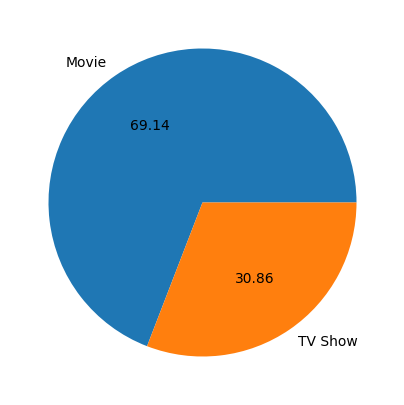

In [28]:
## Number of Movies and TV shows available on Netflix

# Defining figure size
plt.figure(figsize=(5,5))

# Declaring data
type_of_content =df.groupby(by='type').size()

# Plotting data
plt.pie(type_of_content,labels=['Movie','TV Show'],autopct='%.2f')

# Displaying chart
plt.show()

Netflix has more movies (69.14%) than TV shows (30.86%).


In [29]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

<Axes: xlabel='count', ylabel='release_year'>

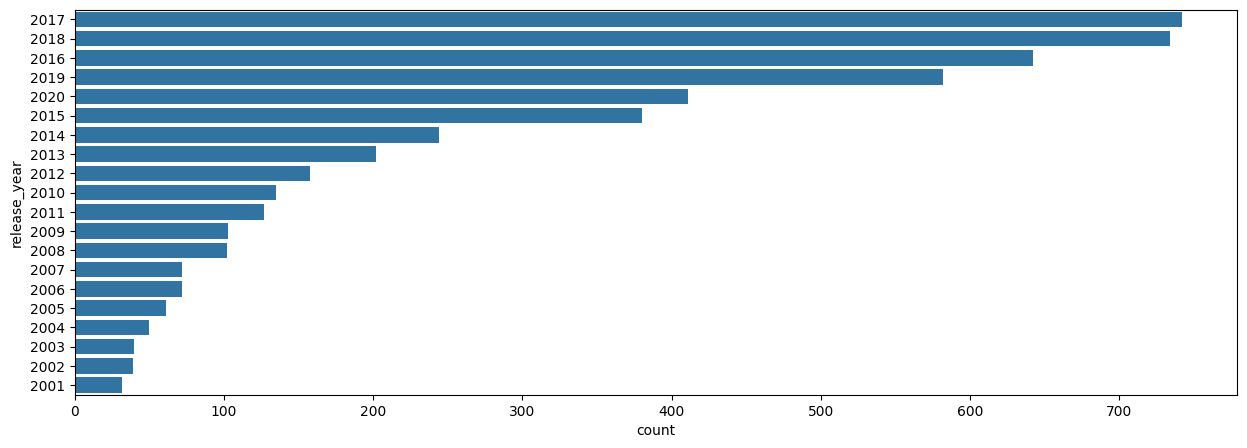

In [30]:
#Analysing how many movies released per year in last 20 years
plt.figure(figsize=(15,5))
sns.countplot(y=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:20])

<Axes: xlabel='count', ylabel='release_year'>

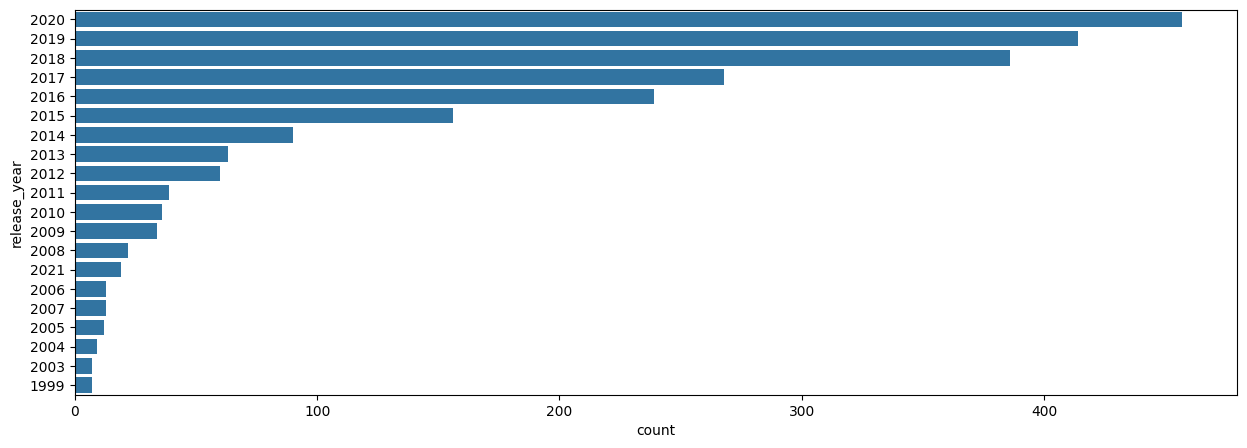

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(y=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:20])

In [32]:
movies_year =movies['release_year'].value_counts().sort_index(ascending=False)
tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)


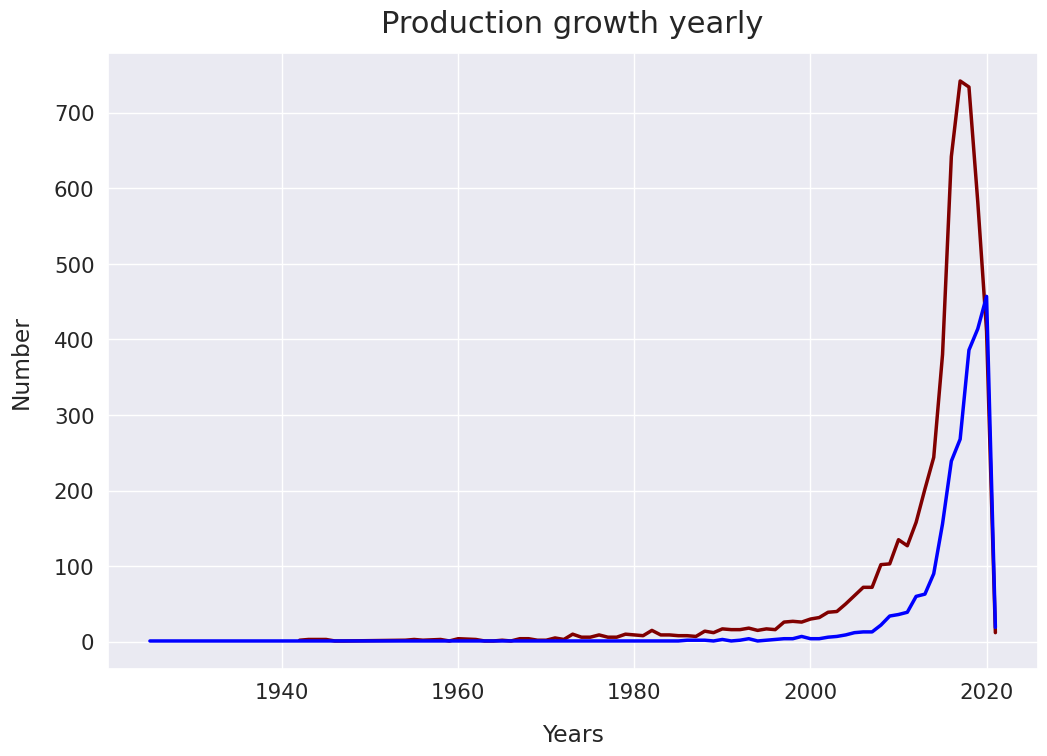

In [33]:
# visualizing the movies and tv_shows based on the release year
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

*  highest number of movies released in 2017 and 2018
*   highest number of movies released in 2020
*  The number of movies on Netflix is growing significantly faster than the number of TV shows.
*   We saw a huge increase in the number of movies and television episodes after 2015.
*    there is a significant drop in the number of movies and television episodes produced after 2020.
*   It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows.


<Axes: title={'center': 'Top10 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

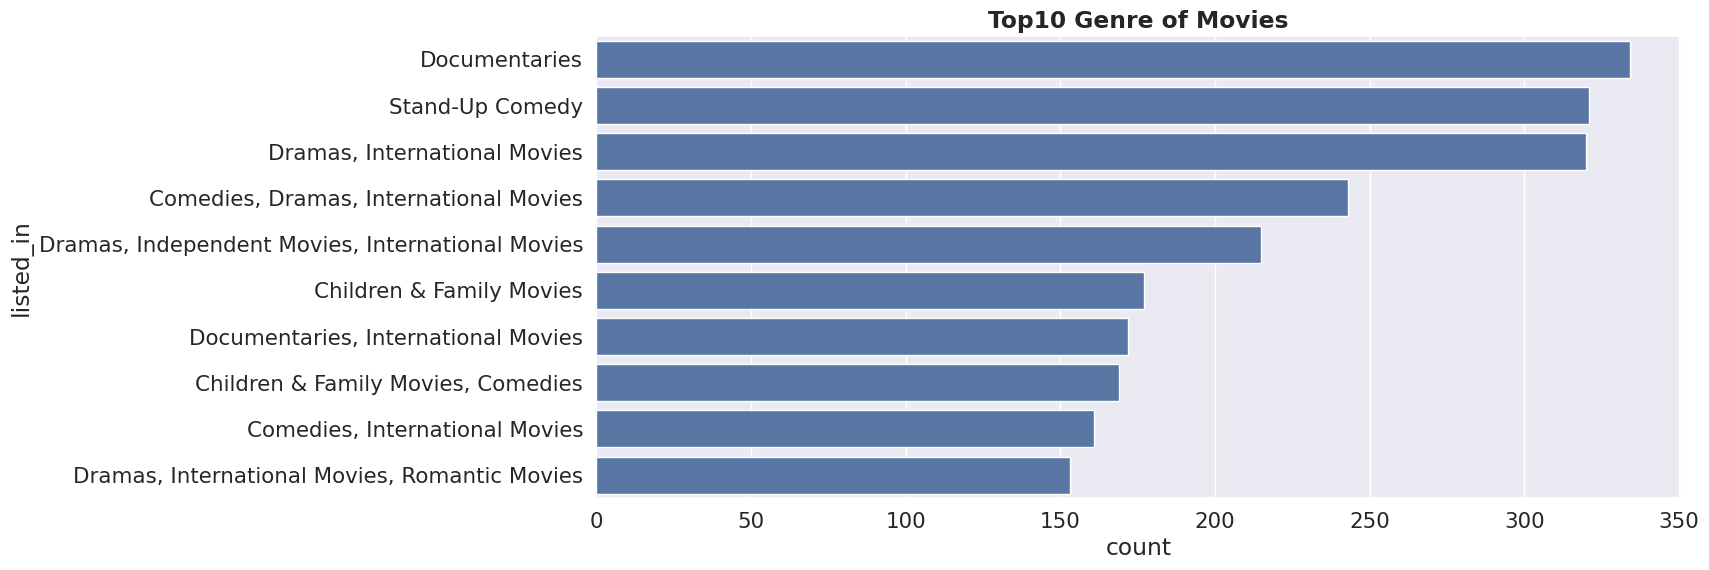

In [34]:
#Analysing top10 genre of the movies
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])

Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies

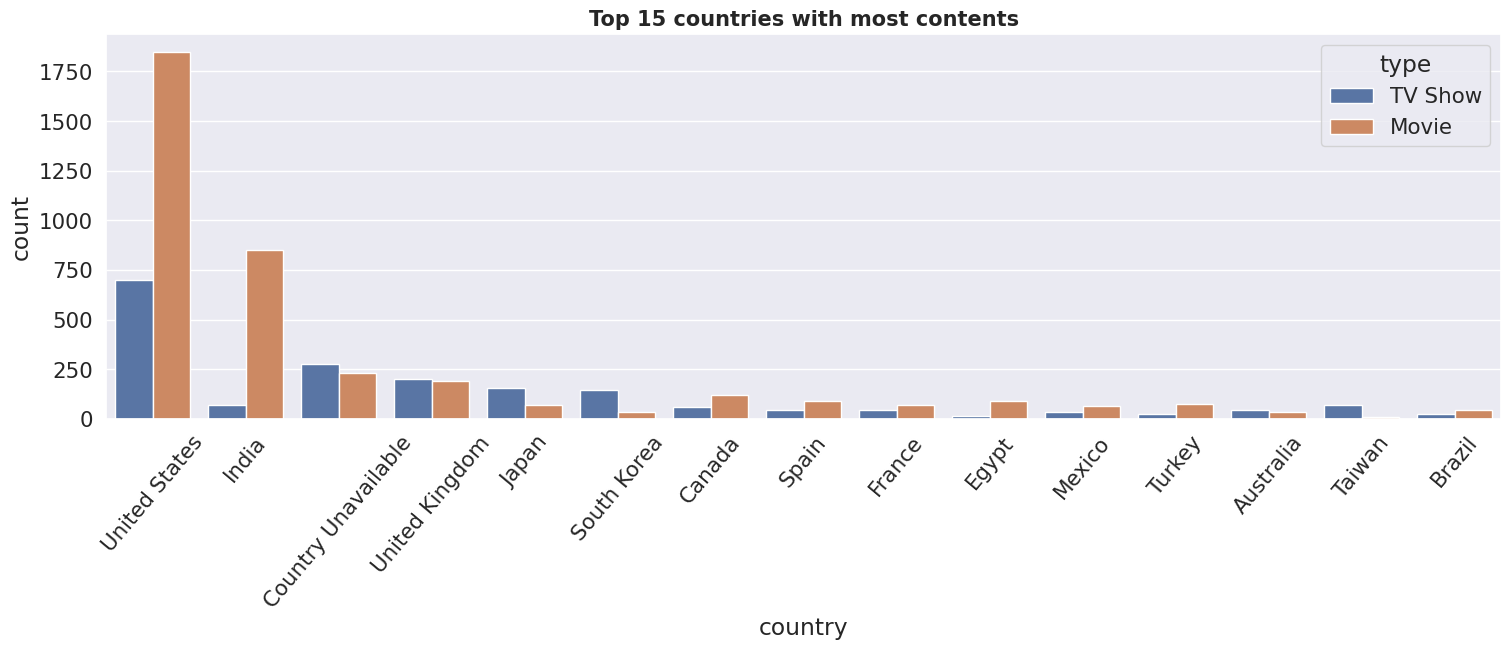

In [40]:
#Analysing top15 countries with most content
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

<Figure size 500x500 with 0 Axes>

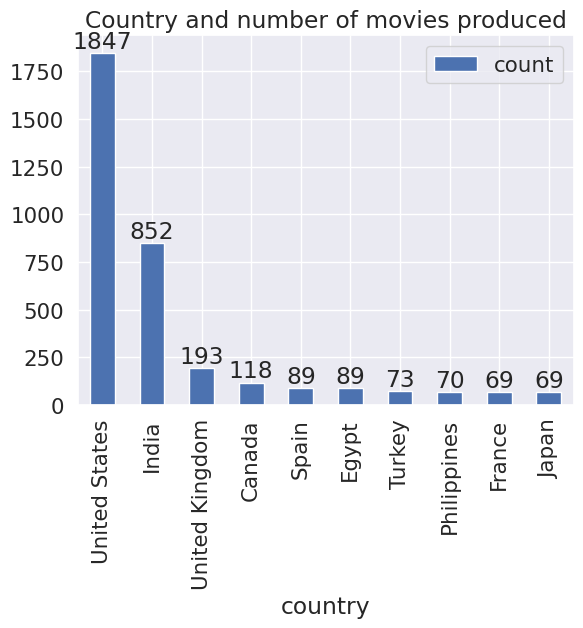

In [36]:
## The country where the majority of movies are produced

# Creating a dataframe for countries where movie are produced and counting them
movie_country_df=pd.DataFrame(movies.groupby(by='country').size()).sort_values(by= 0, ascending = False)
movie_country_df.rename(columns={0:'count'}, inplace=True)

# Removing observations where the country is unavailable
movie_country_df=movie_country_df[movie_country_df.index != 'Country Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting bar graph for top most 10 country
ax=movie_country_df.head(10).plot(kind='bar')

# Assigning labels to the graph
ax.bar_label(ax.containers[0])
plt.title('Country and number of movies produced')

# Displaying plot
plt.show()

The majority of movies available on Netflix are produced in the United States, with India coming in second.


<Figure size 500x500 with 0 Axes>

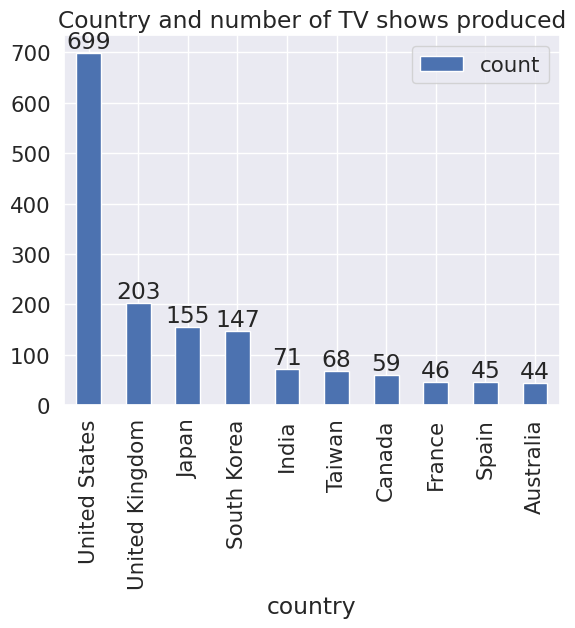

In [37]:
## The country where the majority of TV shows are produced

# Creating a dataframe for countries where TV shows are produced and counting them
tv_show_country_df=pd.DataFrame(tv_shows.groupby(by='country').size()).sort_values(by= 0, ascending = False)
tv_show_country_df.rename(columns={0:'count'}, inplace=True)

# Removing observations where the country is unavailable
tv_show_country_df=tv_show_country_df[tv_show_country_df.index != 'Country Unavailable']

# Defining size of plot
plt.figure(figsize=(5,5))

# Plotting bar graph for top most 10 country
ax=tv_show_country_df.head(10).plot(kind='bar')

# Assigning labels to the graph
plt.title('Country and number of TV shows produced')
ax.bar_label(ax.containers[0])

# Displaying plot
plt.show()

The United States and the United Kingdom are the two countries that produced the most of the TV shows that are available on Netflix.


<Axes: title={'center': 'Top10 Genre of Movies'}, xlabel='count', ylabel='listed_in'>

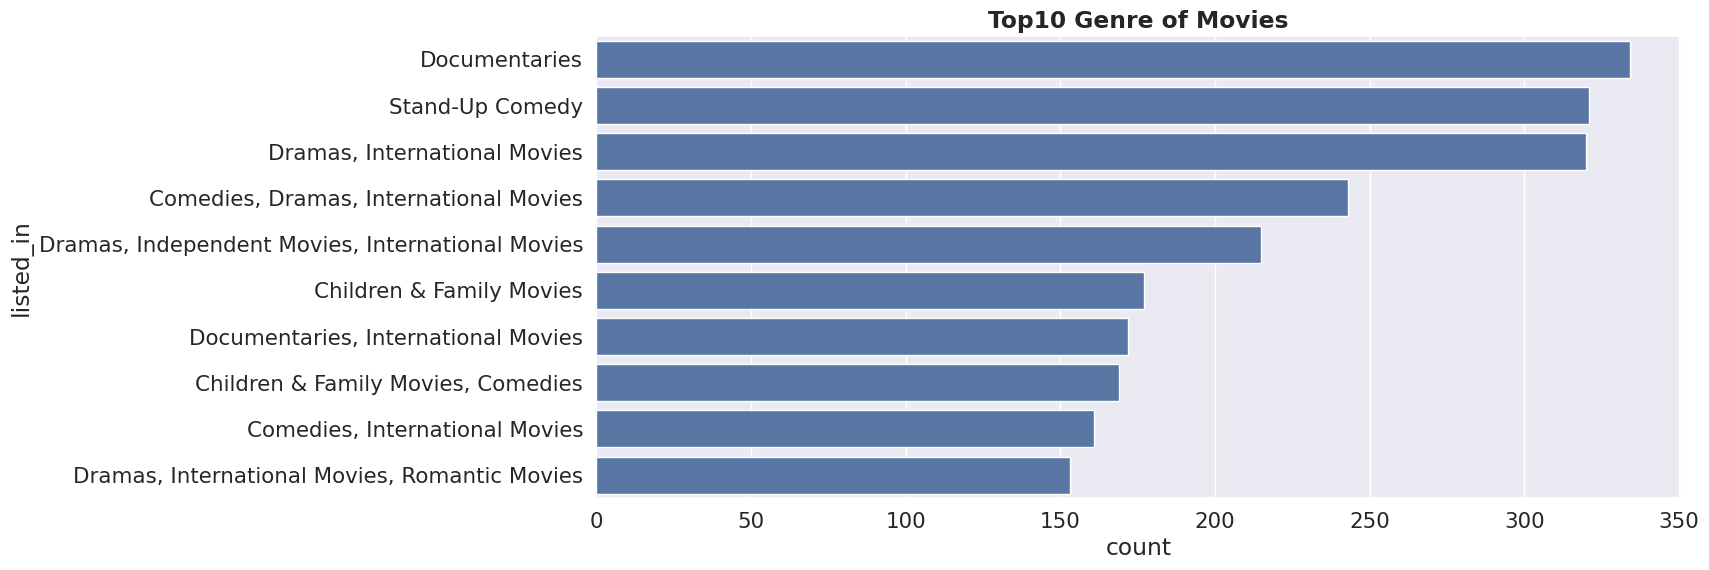

In [39]:
#Analysing top10 genre of the movies
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])

Documentaries are the top most genre in netflix which is fllowed by standup comedy and Drams and international movies

<Axes: title={'center': 'Top10 Genre of TV Shows'}, xlabel='count', ylabel='listed_in'>

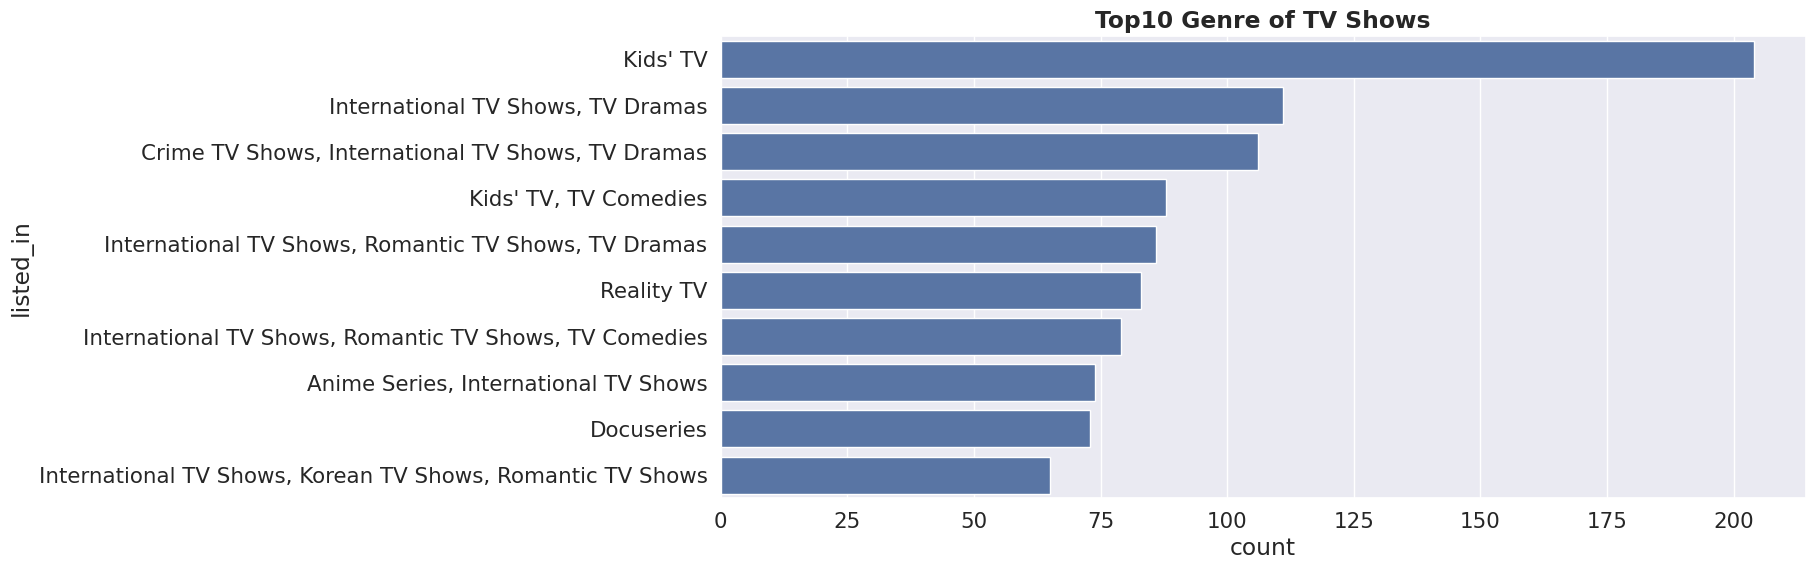

In [38]:
#Analysing top10 genres of TVSHOWS
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])

kids tv is the top most  TV show genre in netflix

**Observation**

*   More movies (69.14%) than TV shows (30.86%) are available on Netflix.
*   The majority of Netflix movies were released between 2015 and 2020, and the majority of Netflix TV shows were released between 2018 and 2020.
*   From 2006 to 2019 Netflix is constantly releasing more new movies than TV shows, but in 2020, it released more TV shows than new movies, indicating that Netflix has been increasingly focusing on TV rather than movies in recent years.
*   The majority of movies added to Netflix in 2019 and the majority of TV shows added to Netflix in 2020.
*   The majority of movies available on Netflix are produced in the United States, with India coming in second.
* The United States and the United Kingdom are the two countries that produced the most of the TV shows that are available on Netflix.







# Feature engineering

In [5]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
df['description'].astype(str)

,description
0,In a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...
2,"When an army recruit is found dead, his fellow..."
3,"In a postapocalyptic world, rag-doll robots hi..."
4,A brilliant group of students become card-coun...
...,...
7782,When Lebanon's Civil War deprives Zozo of his ...
7783,A scrappy but poor boy worms his way into a ty...
7784,"In this documentary, South African rapper Nast..."
7785,Dessert wizard Adriano Zumbo looks for the nex...


In [10]:
# after above change, description in list format, so making list of description feature
df['description'] = df['description'].apply(lambda x: x.split(' '))

In [12]:
# converting text feature to string from list
df['description']= df['description'].apply(lambda x: " ".join(x))
# making all the words in text feature to lowercase
df['description']= df['description'].apply(lambda x: x.lower())

In [14]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)
# applying above function on text feature
df['description']= df['description'].apply(remove_punctuation)

In [16]:
df['description'][0:10]

,description
0,in a future where the elite inhabit an island ...
1,after a devastating earthquake hits mexico cit...
2,when an army recruit is found dead his fellow ...
3,in a postapocalyptic world ragdoll robots hide...
4,a brilliant group of students become cardcount...
5,a genetics professor experiments with a treatm...
6,after an awful accident a couple admitted to a...
7,after one of his high school students attacks ...
8,when a doctor goes missing his psychiatrist wi...
9,an architect and his wife move into a castle t...


In [17]:
# using nltk library to download stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
sw=stopwords.words('english')
#Defining stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)
# applying above function on text feature
df['description']=df['description'].apply(stopwords)
# this is how value in text looks like after removing stopwords
df['description'][0]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [18]:
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7770, 5000)

In [23]:
# convert X into array form for clustering
X = X_tfidf.toarray()

#Applying Clustering Algorithms

**1.Kmean**

Finding the optimal number of clusters using the elbow method

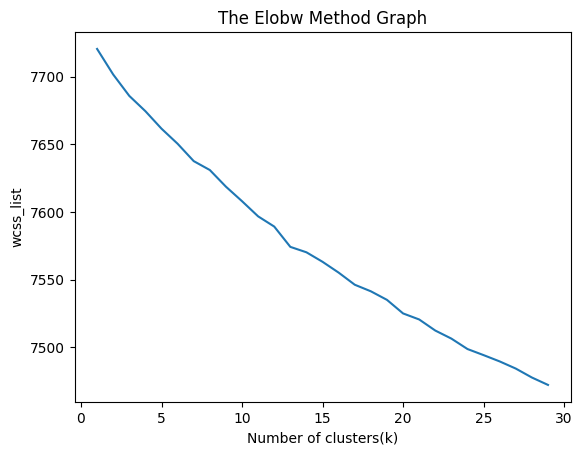

In [26]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

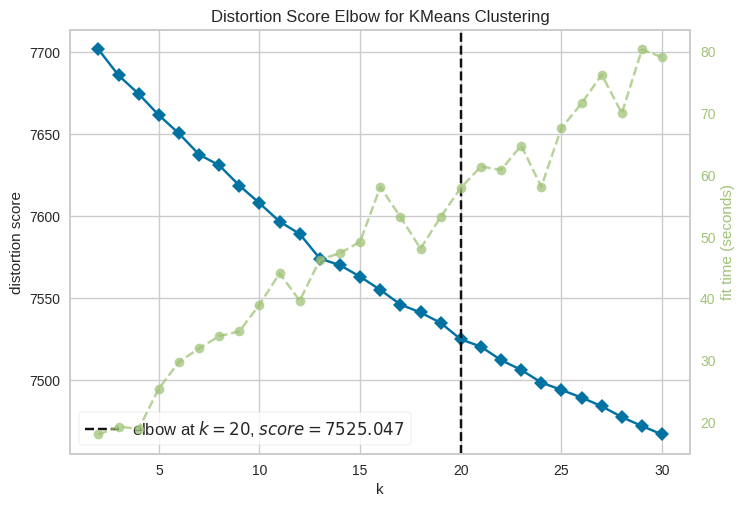

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
## Finding the optimal number of clusters using the Elbow Method

# Import from KMeans algoritham and KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# Instantiate the clustering model and visualizer
KMeans_model = KMeans(random_state=42)
elb_visualizer = kelbow_visualizer(KMeans_model, X, k=(2,31), locate_elbow=True)

# Display figure
elb_visualizer.show()

# elb_visualizer.poof()

In [29]:
# Optimal number of cluster
elbow_optimal_K=elb_visualizer.elbow_value_
print(f'Optimal number of cluster using Elbow method : {elbow_optimal_K}')

Optimal number of cluster using Elbow method : 20


**Silhouette Score Method**

Finding optimal number of cluster using silhouette score method

In [30]:
## Finding the optimal number of clusters using the Silhouette Score Method

# Import from KMeans algoritham and metric silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

num_of_cluster=range(2,31)

for i in num_of_cluster:
    clusterer=KMeans(n_clusters=i)
    preds=clusterer.fit_predict(X)
    centers=clusterer.cluster_centers_
    score=silhouette_score(X, preds)
    print(f"For number of clusters = {i}, silhouette score is {score}")

For number of clusters = 2, silhouette score is 0.00129344249211905
For number of clusters = 3, silhouette score is 0.0019340833927415527
For number of clusters = 4, silhouette score is 0.0024090496040304245
For number of clusters = 5, silhouette score is 0.002483097024438136
For number of clusters = 6, silhouette score is 0.00297901849288921
For number of clusters = 7, silhouette score is 0.003354187016959806
For number of clusters = 8, silhouette score is 0.0038355295301826147
For number of clusters = 9, silhouette score is 0.004126411250371818
For number of clusters = 10, silhouette score is 0.004474767668899123
For number of clusters = 11, silhouette score is 0.004817967318087179
For number of clusters = 12, silhouette score is 0.005375377904044882
For number of clusters = 13, silhouette score is 0.005180938721552388
For number of clusters = 14, silhouette score is 0.005562819761644854
For number of clusters = 15, silhouette score is 0.00583818971553366
For number of clusters = 16,

In [31]:
# Optimal number of cluster
silhouette_optimal_K=30
print(f'Optimal number of cluster using the Silhouette Score Method : {silhouette_optimal_K}')

Optimal number of cluster using the Silhouette Score Method : 30


The optimal number of clusters using the elbow method is 20, and the optimal number of clusters using the silhouette score method is 30. but we choose number of clusters 20 finded by using the elbow method for building the model.


In [32]:
## Training the K-means model on a dataset for number of clusters K=20

# Import dependancy
from sklearn.cluster import KMeans
# Fitting model
kmeans = KMeans(n_clusters=20, init='k-means++', random_state= 42)
kmeans.fit(X)

KMeans(n_clusters=17, random_state=42)

In [33]:
# Centers of the clusters of the model
kmeans_centers=kmeans.cluster_centers_
kmeans_centers

array([[ 1.08420217e-19, -1.95156391e-18, -9.75781955e-19, ...,
        -7.58941521e-19,  1.24683250e-18, -3.25260652e-19],
       [-6.23416249e-19,  1.04072722e-03, -1.08420217e-18, ...,
        -7.58941521e-19,  1.48558258e-03,  1.19891825e-03],
       [-2.43945489e-19,  3.75294923e-03, -1.08420217e-19, ...,
        -6.50521303e-19,  4.87890978e-19, -3.79470760e-19],
       ...,
       [-1.27393755e-18, -3.36102673e-18, -1.24683250e-18, ...,
        -7.58941521e-19,  1.51788304e-18,  1.68051337e-18],
       [-5.42101086e-20, -2.05998413e-18, -9.75781955e-19, ...,
        -7.58941521e-19,  1.30104261e-18,  1.08420217e-19],
       [-1.65340831e-18,  1.13956271e-03,  1.30104261e-18, ...,
         1.49869339e-03,  1.51788304e-18,  5.28365929e-04]])

In [34]:
# Inertia of the model
kmeans_inertia=kmeans.inertia_
kmeans_inertia

7546.252888833751

In [35]:
# Predict result
y_predict= kmeans.predict(X)
y_predict

array([6, 4, 6, ..., 8, 6, 8], dtype=int32)

In [37]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.006282155322763109


In [38]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_predict)

9.990029924176778

In [39]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict

In [40]:
df['cluster'].value_counts()

,count
cluster,
6,3140
16,613
14,423
11,418
4,399
13,334
9,323
10,317
8,269


<Axes: xlabel='cluster', ylabel='count'>

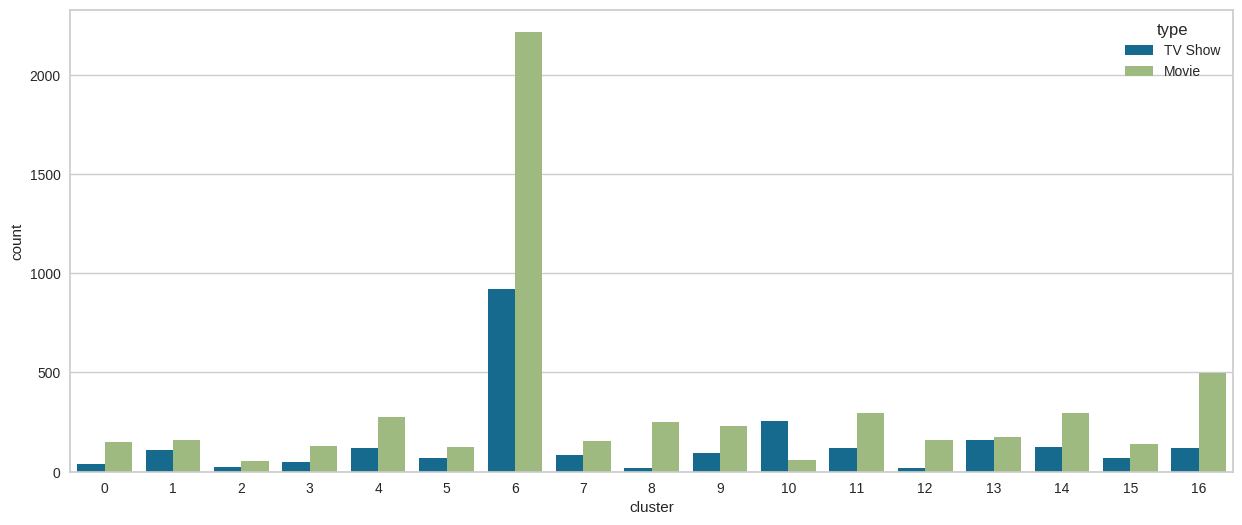

In [44]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, data=df, ax=ax)

cluster 6 has the highest number of datapoints

In [45]:
#SCATTER PLOT FOR CLUSTERS
fig = px.scatter(df, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

# **Hierarchical clustering**

**dendogram**

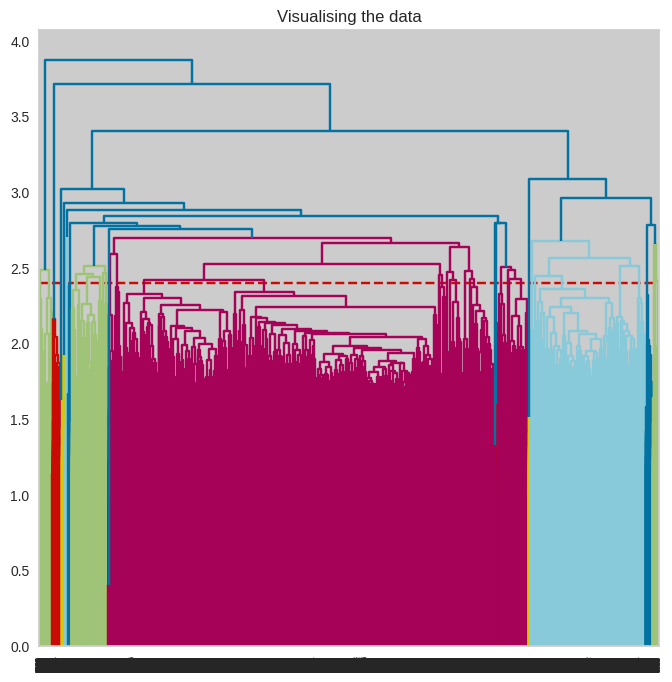

In [54]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
plt.axhline(y=2.4, color='r', linestyle='--')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

In [55]:
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=19, affinity='euclidean', linkage='ward')
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [57]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,2


Evaluation

In [58]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X,y_hc, metric='euclidean'))

Silhouette Coefficient: -0.004


In [59]:
#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_hc)

10.109742334371424

#Observations



*   Model K-Means Clustering has a silhouette_score of 0.0062, which is close to 1 compared to model Hierarchical Clustering (-0.004)

*   Models Hierarchical Clustering (10.109) has a slighty higher davies bouldin score than model K-Means Clustering, which has score of 9.099.

*   Due to its high silhouette_score (0.0062), which is close to 1, the K-Means Clustering model is the ideal model and well-trained for clustering movies and TV shows based on the content.















#Conclusion

**The following observations were made after importing and analyzing the data :**


*   More movies (69.14%) than TV shows (30.86%) are available on Netflix.
The majority of Netflix movies were released between 2015 and 2020, and the majority of - Netflix TV shows were released between 2018 and 2020.
*   The most movies and TV shows were released for public viewing on Netflix in 2017 and 2020, respectively, out of all released years.
*   From 2006 to 2019 Netflix is constantly releasing more new movies than TV shows, but in 2020, it released more TV shows than new movies, indicating that Netflix has been increasingly focusing on TV rather than movies in recent years.
*   More TV shows will be released for public viewing in 2020 and 2021 than at any other time in the history of Netflix.
*   The majority of movies added to Netflix in 2019 and the majority of TV shows added to - Netflix in 2020.
*   The majority of movies available on Netflix are produced in the United States, with India coming in second.
*   The United States and the United Kingdom are the two countries that produced the most of the TV shows that are available on Netflix.




*    **Model K-Means Clustering has a silhouette_score of 0.0062, which is close to 1 compared to model Hierarchical Clustering (-0.004).**



*   **Due to its high silhouette_score (0.0062), which is close to 1, the K-Means Clustering model is the ideal model and well-trained for clustering movies and TV shows based on the content.**

